In [184]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

1) Hysterese
=========

In [185]:
#Hysteresis
I_down=np.array([13.0,11.0,9.0,7.0,5.0,3.0,1.0])
I_up=np.array([1.0,3.0,5.0,7.0,9.0,11.0,13.0])
I_all=np.array([13.0,11.0,9.0,7.0,5.0,3.0,1.0,1.0,3.0,5.0,7.0,9.0,11.0,13.0])
dI=0.3
B_down = np.array([0.343,0.247, 0.203, 0.140, 0.097, 0.057, 0.023]) #mT
dB_down=np.array([0.025, 0.017, 0.012, 0.008, 0.017, 0.005, 0.005])
B_all=np.array([0.343,0.247, 0.203, 0.140, 0.097, 0.057, 0.023,0.020, 0.070, 0.103, 0.123, 0.150, 0.23, 0.28])
dB_all=np.array([0.025, 0.017, 0.012, 0.008, 0.017, 0.005, 0.005,0.008,0.008,0.005,0.005,0.008,0.008,0.008])
B_up = np.array([0.020, 0.070, 0.103, 0.123, 0.150, 0.23, 0.28])
dB_up = np.array([0.008,0.008,0.005,0.005,0.008,0.008,0.008])

A 0.0225077360384 +- 0.00143726112199
B -0.00583028220757 +- 0.0068232446689


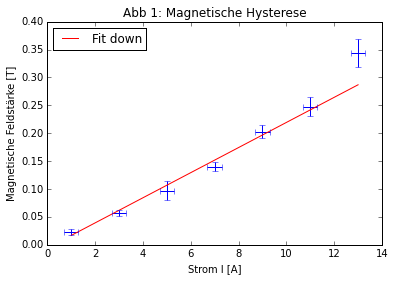

In [186]:
def Bfit(x,A,B):
    return A*x+B

popt, pcov=curve_fit(Bfit,I_down, B_down, sigma=dB_down)

plt.plot(I_down, Bfit(I_down,*popt), "-r", label="Fit down")
plt.errorbar(I_down, B_down, xerr=dI, yerr=dB_down, fmt="none")

plt.title("Abb 1: Magnetische Hysterese ")
plt.xlabel("Strom I [A]")
plt.ylabel("Magnetische Feldstärke [T]")
plt.legend(loc="best")
plt.savefig("Hysterese.pdf")
print("A", popt[0], "+-", pcov[0,0]**0.5)
print("B", popt[1], "+-", pcov[1,1]**0.5)

A 0.0203127055833 +- 0.00193052440177
B -0.00464589152856 +- 0.014494059171


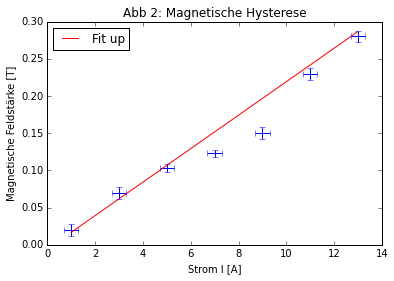

In [187]:
popt1, pcov1=curve_fit(Bfit,I_up, B_up, sigma=dB_up)
plt.plot(I_up, Bfit(I_up,*popt), "-r", label="Fit up")
plt.errorbar(I_up, B_up, xerr=dI, yerr=dB_up, fmt="none")

plt.title("Abb 2: Magnetische Hysterese")
plt.xlabel("Strom I [A]")
plt.ylabel("Magnetische Feldstärke [T]")
plt.legend(loc="best")
plt.savefig("Hysterese1.pdf")
print("A", popt1[0], "+-", pcov1[0,0]**0.5)
print("B", popt1[1], "+-", pcov1[1,1]**0.5)

A 0.0205607247095 +- 0.00112631006555
B -0.00315843302625 +- 0.00733468400318


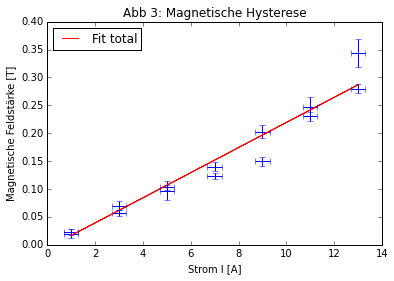

In [188]:
popt2, pcov2=curve_fit(Bfit,I_all, B_all, sigma=dB_all)
plt.plot(I_all, Bfit(I_all,*popt), "-r", label="Fit total")
plt.errorbar(I_all, B_all, xerr=dI, yerr=dB_all, fmt="none")

plt.title("Abb 3: Magnetische Hysterese")
plt.xlabel("Strom I [A]")
plt.ylabel("Magnetische Feldstärke [T]")
plt.legend(loc="best")
plt.savefig("Hysterese2.pdf")
print("A", popt2[0], "+-", pcov2[0,0]**0.5)
print("B", popt2[1], "+-", pcov2[1,1]**0.5)

In [189]:
print("10A",Bfit(10,popt2[0],popt2[1]),"+-", pcov2[0,0]**0.5 *10+pcov2[1,1]**0.5)
print("12A",Bfit(12,popt2[0],popt2[1]), "+-", pcov2[0,0]**0.5 *12+pcov2[1,1]**0.5)
print("13A",Bfit(13,popt2[0],popt2[1]), "+-",pcov2[0,0]**0.5 *13+pcov2[1,1]**0.5)

10A 0.202448814069 +- 0.0185977846587
12A 0.243570263488 +- 0.0208504047898
13A 0.264130988198 +- 0.0219767148553


2) Transversale Shifts
=========

In [190]:
def fitfunc(x,a,b,c):
    return a*x**2+b*x+c

In [191]:
Order=np.array([8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0])
pi10A=np.array([76.4,165.74,261.07,363.95,476.64,602.32,747.17,923.86])
dpi10A=np.array([10.48, 10.94, 11.48, 12.59, 13.46, 15.41, 18.23, 22.97])
pi12A=np.array([74.02, 163.43, 258.71, 361.57, 474.18, 599.76, 744.74, 920.93])
dpi12A=np.array([10.49, 11.05, 11.46, 12.70, 13.52, 15.72, 18.30, 23.82])
pi13A=np.array([72.6, 162.03,257.29,360.08,472.63,598.18,743.06,919.12])
dpi13A=np.array([10.46,11.11,11.46,12.77,13.54,15.82,18.15,24.05])

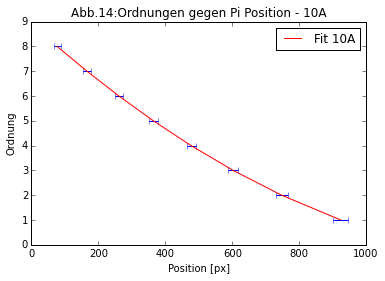

In [192]:
plt.errorbar(pi10A, Order,xerr=dpi10A,fmt="none")
popt, pcov=curve_fit(fitfunc,pi10A, Order, sigma=dpi10A)
plt.plot(pi10A,fitfunc(pi10A,*popt), "-r", label="Fit 10A")
plt.title("Abb.14:Ordnungen gegen Pi Position - 10A")
plt.xlabel("Position [px]")
plt.ylabel("Ordnung")
plt.legend(loc="best")
plt.ylim(0.,9.)
plt.savefig("OrdnungPi10A.pdf")


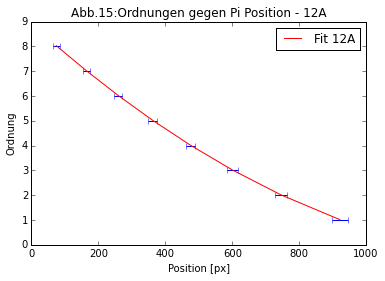

In [193]:
plt.errorbar(pi12A, Order,xerr=dpi12A,fmt="none")
popt1, pcov1=curve_fit(fitfunc,pi12A, Order, sigma=dpi12A)
plt.plot(pi12A,fitfunc(pi12A,*popt), "-r", label="Fit 12A")
plt.title("Abb.15:Ordnungen gegen Pi Position - 12A")
plt.xlabel("Position [px]")
plt.ylabel("Ordnung")
plt.legend(loc="best")
plt.ylim(0.,9.)
plt.savefig("OrdnungPi12A.pdf")


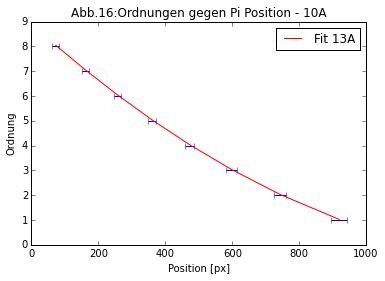

In [194]:
plt.errorbar(pi13A, Order,xerr=dpi13A,fmt="none")
popt2, pcov2=curve_fit(fitfunc,pi13A, Order, sigma=dpi13A)
plt.plot(pi13A,fitfunc(pi13A,*popt), "-r", label="Fit 13A")
plt.title("Abb.16:Ordnungen gegen Pi Position - 10A")
plt.xlabel("Position [px]")
plt.ylabel("Ordnung")
plt.legend(loc="best")
plt.ylim(0.,9.)
plt.savefig("OrdnungPi13A.pdf")


In [195]:
d=np.array([72.6, 162.03,257.29,360.08,472.63,598.18,743.06,919.12])+np.array([10.46,11.11,11.46,12.77,13.54,15.82,18.15,24.05])

In [196]:
print(d)

[  83.06  173.14  268.75  372.85  486.17  614.    761.21  943.17]


In [197]:
s8l=fitfunc(72.60,popt2[0],popt2[1],popt2[2])-fitfunc(50.39,popt2[0],popt2[1],popt2[2])
s8r=fitfunc(72.60,popt2[0],popt2[1],popt2[2])-fitfunc(96.01,popt2[0],popt2[1],popt2[2])
s7l=fitfunc(162.03,popt2[0],popt2[1],popt2[2])-fitfunc(138.08,popt2[0],popt2[1],popt2[2])
s7r=fitfunc(162.03,popt2[0],popt2[1],popt2[2])-fitfunc(186.44,popt2[0],popt2[1],popt2[2])
s6l=fitfunc(257.29,popt2[0],popt2[1],popt2[2])-fitfunc(231.26,popt2[0],popt2[1],popt2[2])
s6r=fitfunc(257.29,popt2[0],popt2[1],popt2[2])-fitfunc(283.84,popt2[0],popt2[1],popt2[2])
s5l=fitfunc(360.08,popt2[0],popt2[1],popt2[2])-fitfunc(332.34,popt2[0],popt2[1],popt2[2])
s5r=fitfunc(360.08,popt2[0],popt2[1],popt2[2])-fitfunc(388.65,popt2[0],popt2[1],popt2[2])
s4l=fitfunc(472.63,popt2[0],popt2[1],popt2[2])-fitfunc(441.56,popt2[0],popt2[1],popt2[2])
s4r=fitfunc(472.63,popt2[0],popt2[1],popt2[2])-fitfunc(505.02,popt2[0],popt2[1],popt2[2])
s3l=fitfunc(598.18,popt2[0],popt2[1],popt2[2])-fitfunc(564.11,popt2[0],popt2[1],popt2[2])
s3r=fitfunc(598.18,popt2[0],popt2[1],popt2[2])-fitfunc(635.01,popt2[0],popt2[1],popt2[2])
s2l=fitfunc(743.06,popt2[0],popt2[1],popt2[2])-fitfunc(702.27,popt2[0],popt2[1],popt2[2])
s2r=fitfunc(743.06,popt2[0],popt2[1],popt2[2])-fitfunc(786.47,popt2[0],popt2[1],popt2[2])
s1l=fitfunc(919.12,popt2[0],popt2[1],popt2[2])-fitfunc(868.06,popt2[0],popt2[1],popt2[2])
s1r=fitfunc(919.12,popt2[0],popt2[1],popt2[2])-fitfunc(975.94,popt2[0],popt2[1],popt2[2])
p8=fitfunc(72.60,popt2[0],popt2[1],popt2[2])-8
p7=fitfunc(162.03,popt2[0],popt2[1],popt2[2])-7
p6=fitfunc(257.29,popt2[0],popt2[1],popt2[2])-6
p5=fitfunc(360.08,popt2[0],popt2[1],popt2[2])-5
p4=fitfunc(472.63,popt2[0],popt2[1],popt2[2])-4
p3=fitfunc(598.18,popt2[0],popt2[1],popt2[2])-3
p2=fitfunc(743.06,popt2[0],popt2[1],popt2[2])-2
p1=fitfunc(919.12,popt2[0],popt2[1],popt2[2])-1
ds8l=(fitfunc(61.98,popt2[0],popt2[1],popt2[2])-fitfunc(50.39,popt2[0],popt2[1],popt2[2]))/11.59
ds8r=(fitfunc(107.15,popt2[0],popt2[1],popt2[2])-fitfunc(96.01,popt2[0],popt2[1],popt2[2]))/11.14
ds7l=(fitfunc(150.14,popt2[0],popt2[1],popt2[2])-fitfunc(138.08,popt2[0],popt2[1],popt2[2]))/12.06
ds7r=(fitfunc(198.72,popt2[0],popt2[1],popt2[2])-fitfunc(186.44,popt2[0],popt2[1],popt2[2]))/12.28
ds6l=(fitfunc(244.87,popt2[0],popt2[1],popt2[2])-fitfunc(231.26,popt2[0],popt2[1],popt2[2]))/13.61
ds6r=(fitfunc(295.53,popt2[0],popt2[1],popt2[2])-fitfunc(283.84,popt2[0],popt2[1],popt2[2]))/11.69
ds5l=(fitfunc(346.62,popt2[0],popt2[1],popt2[2])-fitfunc(332.34,popt2[0],popt2[1],popt2[2]))/14.28
ds5r=(fitfunc(402.36,popt2[0],popt2[1],popt2[2])-fitfunc(388.65,popt2[0],popt2[1],popt2[2]))/13.71
ds4l=(fitfunc(456.96,popt2[0],popt2[1],popt2[2])-fitfunc(441.56,popt2[0],popt2[1],popt2[2]))/15.4
ds4r=(fitfunc(519.0,popt2[0],popt2[1],popt2[2])-fitfunc(505.02,popt2[0],popt2[1],popt2[2]))/13.98
ds3l=(fitfunc(582.22,popt2[0],popt2[1],popt2[2])-fitfunc(564.11,popt2[0],popt2[1],popt2[2]))/18.11
ds3r=(fitfunc(605.54,popt2[0],popt2[1],popt2[2])-fitfunc(635.01,popt2[0],popt2[1],popt2[2]))/15.53
ds2l=(fitfunc(720.88,popt2[0],popt2[1],popt2[2])-fitfunc(702.27,popt2[0],popt2[1],popt2[2]))/18.61
ds2r=(fitfunc(803.66,popt2[0],popt2[1],popt2[2])-fitfunc(786.47,popt2[0],popt2[1],popt2[2]))/17.19
ds1l=(fitfunc(894.45,popt2[0],popt2[1],popt2[2])-fitfunc(868.06,popt2[0],popt2[1],popt2[2]))/26.39
ds1r=(fitfunc(999.59,popt2[0],popt2[1],popt2[2])-fitfunc(975.94,popt2[0],popt2[1],popt2[2]))/23.65
dp8=(fitfunc(83.03,popt2[0],popt2[1],popt2[2])-fitfunc(72.60,popt2[0],popt2[1],popt2[2]))/10.46
dp7=(fitfunc(173.14,popt2[0],popt2[1],popt2[2])-fitfunc(162.03,popt2[0],popt2[1],popt2[2]))/11.11
dp6=(fitfunc(268.75,popt2[0],popt2[1],popt2[2])-fitfunc(257.29,popt2[0],popt2[1],popt2[2]))/11.46
dp5=(fitfunc(372.85,popt2[0],popt2[1],popt2[2])-fitfunc(360.08,popt2[0],popt2[1],popt2[2]))/12.77
dp4=(fitfunc(486.17,popt2[0],popt2[1],popt2[2])-fitfunc(472.63,popt2[0],popt2[1],popt2[2]))/13.54
dp3=(fitfunc(614.0,popt2[0],popt2[1],popt2[2])-fitfunc(598.18,popt2[0],popt2[1],popt2[2]))/15.82
dp2=(fitfunc(761.21,popt2[0],popt2[1],popt2[2])-fitfunc(743.06,popt2[0],popt2[1],popt2[2]))/18.15
dp1=(fitfunc(943.17,popt2[0],popt2[1],popt2[2])-fitfunc(919.12,popt2[0],popt2[1],popt2[2]))/24.05

In [198]:
s1r

0.27094902576674507

In [199]:
sl=np.array([s8l,s7l,s6l,s5l,s4l,s3l,s2l,s1l])
dsl=np.array([ds8l,ds7l,ds6l,ds5l,ds4l,ds3l,ds2l,ds1l])
sr=np.array([s8r,s7r,s6r,s5r,s4r,s3r,s2r,s1r])
dsr=np.array([ds8r,ds7r,ds6r,ds5r,ds4r,ds3r,ds2r,ds1r])
p=np.array([p8,p7,p6,p5,p4,p3,p2,p1])
dp=np.array([dp8,dp7,dp6,dp5,dp4,dp3,dp2,dp1])

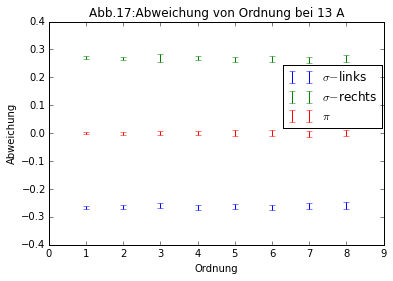

In [200]:
plt.errorbar(Order,sl, yerr=dsl, fmt="none",label="$\sigma-$links")
plt.errorbar(Order,sr,yerr=dsr, fmt="none", label="$\sigma-$rechts")
plt.errorbar(Order,p,yerr=dp, fmt="none", label="$\pi$")
plt.title("Abb.17:Abweichung von Ordnung bei 13 A")
plt.xlabel("Ordnung")
plt.ylabel("Abweichung")
plt.legend(loc=(0.7007,0.525))
plt.xlim(0.,9.)
plt.ylim(-0.4,0.4)
plt.savefig("AbweichungOrdnung13.pdf")

In [201]:
DeltaLambda = (639.60)**2/(2*4040000*np.sqrt(1.4567**2-1))#Spektralrange mit lambda cadmium in nm
dDeltaLambda= 2*DeltaLambda**2/639.6

In [202]:
sl13=np.mean(sl)#Mittelwert Abweichung nach unten
dsl13=np.std(sl)
sr13=np.mean(sr)#Mittelwert Abweichung nach oben
dsr13=np.std(sr)

In [203]:
delLambdal= sl13*DeltaLambda#Wellenlängenshift nach unten in nm
delLambdar= sr13*DeltaLambda#Wellenlängenshift nach oben in nm
ddelLambdal=delLambdal*np.sqrt((dsl13/sl13)**2 + (dDeltaLambda/DeltaLambda)**2)
ddelLambdar=delLambdar*np.sqrt((dsr13/sr13)**2 + (dDeltaLambda/DeltaLambda)**2)

hc=1.9864459e-16

In [204]:
DeltaEnergiel =hc/639.6 -hc/(639.6+delLambdal)
dDeltaEnergiel =hc*np.sqrt((-dDeltaLambda/639.6**2 + dDeltaLambda/(639.6+delLambdal)**2)**2 +(ddelLambdal/(639.6+delLambdal)**2)**2)
DeltaEnergier =hc/639.6 -hc/(639.6+delLambdar)
dDeltaEnergier = hc*np.sqrt((-dDeltaLambda/639.6**2 + dDeltaLambda/(639.6+delLambdar)**2)**2 +(ddelLambdar/(639.6+delLambdar)**2)**2)

In [205]:
#Bohrsches Magneton für 13A
muBl = np.abs(DeltaEnergiel/0.264)
dmuBl= np.sqrt((dDeltaEnergiel/DeltaEnergiel)**2+(0.022/0.264)**2)*muBl
print("Bohr Abweichung nach unten", muBl, "+-", dmuBl)
muBr = np.abs(DeltaEnergier/0.264)
dmuBr=np.sqrt((dDeltaEnergier/DeltaEnergier)**2+(0.022/0.264)**2)*muBr
print("Bohr Abweichung nach oben", muBr, "+-", dmuBr)

Bohr Abweichung nach unten 2.31250783083e-23 +- 1.9439511251e-24
Bohr Abweichung nach oben 2.35090018322e-23 +- 1.97597868087e-24


In [206]:
#10 und 12A
p10=np.array([76.40,165.74,261.07,363.95,476.64,602.32,747.17,923.86])
dp10=np.array([10.48,10.94,11.48,12.59,13.46,15.41,18.23,22.97])
sl10=np.array([57.55,145.51,239.33,340.43,450.36,573.26,712.44,880.32])
sr10=np.array([95.93,186.28,283.18,388.13,503.45,632.86,783.17,971.06])
dsl10=np.array([12.51,12.52,14.09,14.67,16.08,18.04,19.39,27.33])
dsr10=np.array([11.89,12.63,12.23,13.64,14.25,16.22,18.7,24.73])
p12=np.array([74.02,163.43,258.71,361.57,474.18,599.76,744.74,920.93])
dp12=np.array([10.49,11.05,11.46,12.70,13.52,15.72,18.30,23.82])
sl12=np.array([52.67,140.45,233.82,334.90,444.29,567.01,705.48,871.85])
sr12=np.array([96.43,186.79,284.13,389.01,505.11,634.99,786.20,975.40])
dsl12=np.array([11.65,12.2,13.47,14.20,15.81,17.80,18.70,26.11])
dsr12=np.array([11.28,12.5,11.66,13.51,14.22,15.57,17.54,23.32])


In [207]:
Gsl10=fitfunc(p10,popt2[0],popt2[1],popt2[2])-fitfunc(sl10,popt2[0],popt2[1],popt2[2])
dGsl10=(fitfunc(sl10+dsl10,popt2[0],popt2[1],popt2[2])-fitfunc(sl10,popt2[0],popt2[1],popt2[2]))/dsl10
Gsr10=fitfunc(p10,popt2[0],popt2[1],popt2[2])-fitfunc(sr10,popt2[0],popt2[1],popt2[2])
dGsr10=(fitfunc(sr10+dsr10,popt2[0],popt2[1],popt2[2])-fitfunc(sr10,popt2[0],popt2[1],popt2[2]))/dsr10
Gp10=fitfunc(p10,popt2[0],popt2[1],popt2[2])-Order
dGp10=(fitfunc(p10,popt2[0],popt2[1],popt2[2])-Order)/p10
Gsl12=fitfunc(p12,popt2[0],popt2[1],popt2[2])-fitfunc(sl12,popt2[0],popt2[1],popt2[2])
dGsl12=(fitfunc(sl12+dsl12,popt2[0],popt2[1],popt2[2])-fitfunc(sl12,popt2[0],popt2[1],popt2[2]))/dsl12
Gsr12=fitfunc(p12,popt2[0],popt2[1],popt2[2])-fitfunc(sr12,popt2[0],popt2[1],popt2[2])
dGsr12=(fitfunc(sr12+dsr12,popt2[0],popt2[1],popt2[2])-fitfunc(sr12,popt2[0],popt2[1],popt2[2]))/dsr12
Gp12=fitfunc(p12,popt2[0],popt2[1],popt2[2])-Order
dGp12=(fitfunc(p12,popt2[0],popt2[1],popt2[2])-Order)/p12

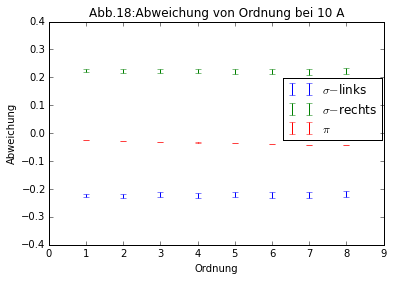

In [208]:
plt.errorbar(Order,Gsl10, yerr=dGsl10, fmt="none",label="$\sigma-$links")
plt.errorbar(Order,Gsr10,yerr=dGsr10, fmt="none", label="$\sigma-$rechts")
plt.errorbar(Order,Gp10,yerr=dGp10, fmt="none", label="$\pi$")
plt.title("Abb.18:Abweichung von Ordnung bei 10 A")
plt.xlabel("Ordnung")
plt.ylabel("Abweichung")
plt.legend(loc=(0.7007,0.468))
plt.xlim(0.,9.)
plt.ylim(-0.4,0.4)
plt.savefig("AbweichungOrdnung10.pdf")

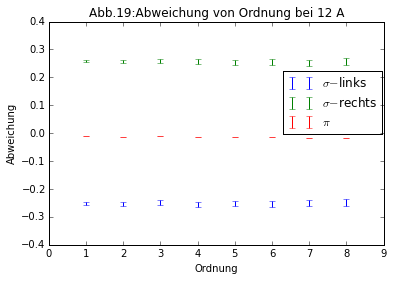

In [209]:
plt.errorbar(Order,Gsl12, yerr=dGsl12, fmt="none",label="$\sigma-$links")
plt.errorbar(Order,Gsr12,yerr=dGsr12, fmt="none", label="$\sigma-$rechts")
plt.errorbar(Order,Gp12,yerr=dGp12, fmt="none", label="$\pi$")
plt.title("Abb.19:Abweichung von Ordnung bei 12 A")
plt.xlabel("Ordnung")
plt.ylabel("Abweichung")
plt.legend(loc=(0.7007,0.498))
plt.xlim(0.,9.)
plt.ylim(-0.4,0.4)
plt.savefig("AbweichungOrdnung12.pdf")

In [210]:
B = np.array([202,243])
dB = np.array([19,21])

MGsl10=np.mean(Gsl10)#Mittelwert Abweichung nach unten
dMGsl10=np.std(Gsl10)/np.sqrt(8)
MGsl12=np.mean(Gsl12)#Mittelwert Abweichung nach unten
dMGsl12=np.std(Gsl12)/np.sqrt(8)
MGsr10=np.mean(Gsr10)#Mittelwert Abweichung nach oben
dMGsr10=np.std(Gsr10)/np.sqrt(8)
MGsr12=np.mean(Gsr12)#Mittelwert Abweichung nach oben
dMGsr12=np.std(Gsr12)/np.sqrt(8)

delLambdal10= MGsl10*DeltaLambda#Wellenlängenshift nach unten in nm
delLambdar10= MGsr10*DeltaLambda#Wellenlängenshift nach oben in nm
delLambdal12= MGsl12*DeltaLambda#Wellenlängenshift nach unten in nm
delLambdar12= MGsr12*DeltaLambda#Wellenlängenshift nach oben in nm
ddelLambdal10=delLambdal10*np.sqrt((dMGsl10/MGsl10)**2 + (dDeltaLambda/DeltaLambda)**2)
ddelLambdar10=delLambdar10*np.sqrt((dMGsr10/MGsr10)**2 + (dDeltaLambda/DeltaLambda)**2)
ddelLambdal12=delLambdal12*np.sqrt((dMGsl12/MGsl12)**2 + (dDeltaLambda/DeltaLambda)**2)
ddelLambdar12=delLambdar12*np.sqrt((dMGsr12/MGsr12)**2 + (dDeltaLambda/DeltaLambda)**2)

DeltaEnergiel10 =hc/639.6 -hc/(639.6+delLambdal10)
dDeltaEnergiel10 =hc*np.sqrt((-dDeltaLambda/639.6**2 + dDeltaLambda/(639.6+delLambdal10)**2)**2 +(ddelLambdal10/(639.6+delLambdal10)**2)**2)
DeltaEnergier10 =hc/639.6 -hc/(639.6+delLambdar10)
dDeltaEnergier10 = hc*np.sqrt((-dDeltaLambda/639.6**2 + dDeltaLambda/(639.6+delLambdal)**2)**2 +(ddelLambdar10/(639.6+delLambdar10)**2)**2)
DeltaEnergiel12 =hc/639.6 -hc/(639.6+delLambdal12)
dDeltaEnergiel12 =hc*np.sqrt((-dDeltaLambda/639.6**2 + dDeltaLambda/(639.6+delLambdal)**2)**2 +(ddelLambdal12/(639.6+delLambdal12)**2)**2)
DeltaEnergier12 =hc/639.6 -hc/(639.6+delLambdar12)
dDeltaEnergier12 = hc*np.sqrt((-dDeltaLambda/639.6**2 + dDeltaLambda/(639.6+delLambdal)**2)**2 +(ddelLambdar12/(639.6+delLambdar12)**2)**2)

muBl10 = np.abs(DeltaEnergiel10/0.202)
dmuBl10= np.sqrt((dDeltaEnergiel10/DeltaEnergiel10)**2+(0.019/0.202)**2)*muBl10
print("Bohr Abweichung nach unten", muBl10, "+-", dmuBl10)
muBr10 = np.abs(DeltaEnergier10/0.202)
dmuBr10=np.sqrt((dDeltaEnergier10/DeltaEnergier10)**2+(0.019/0.202)**2)*muBr10
print("Bohr Abweichung nach oben", muBr10, "+-", dmuBr10)
muBl12 = np.abs(DeltaEnergiel12/0.243)
dmuBl12= np.sqrt((dDeltaEnergiel12/DeltaEnergiel12)**2+(0.021/0.243)**2)*muBl12
print("Bohr Abweichung nach unten", muBl12, "+-", dmuBl12)
muBr12 = np.abs(DeltaEnergier12/0.243)
dmuBr12=np.sqrt((dDeltaEnergier12/DeltaEnergier12)**2+(0.021/0.243)**2)*muBr12
print("Bohr Abweichung nach oben", muBr12, "+-", dmuBr12)




Bohr Abweichung nach unten 2.54477462755e-23 +- 2.39485921289e-24
Bohr Abweichung nach oben 2.55969405544e-23 +- 2.40821827677e-24
Bohr Abweichung nach unten 2.40838795959e-23 +- 2.08323061632e-24
Bohr Abweichung nach oben 2.4427591116e-23 +- 2.11288733682e-24


In [211]:
muBAll=np.array([25.4,24.1,23.1,25.6,24.4,23.5])
dmuBAll=np.array([2.4,2.1,1.9,2.4,2.1,2.0])
print("Mittelwert", np.mean(muBAll))
print("Standardabweichung", np.std(muBAll))
print("Fehler", 1/6 *np.sqrt(2.4**2+2.4**2+2.1**2+2.1**2+1.9**2+2.0**2))

Mittelwert 24.35
Standardabweichung 0.914239210127
Fehler 0.881129325859


In [212]:
print("Abweichung zum Literaturwert",((24.2-9.27400949)/np.sqrt(0.9**2+0.9**2)))

Abweichung zum Literaturwert 11.7269656728


Part II
=========

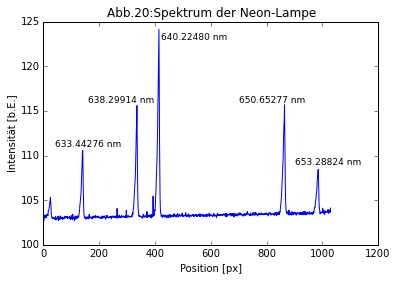

In [213]:
x, y = np.loadtxt("TobiThimo/NeonShift.xls", unpack=True, skiprows=1)
plt.plot(x[0:1030],y[0:1030])
plt.title("Abb.20:Spektrum der Neon-Lampe")
plt.xlabel("Position [px]")
plt.ylabel("Intensität [b.E.]")
plt.text(420, 123, "640.22480 nm", fontsize=9)
plt.text(160, 116, "638.29914 nm", fontsize=9)
plt.text(40, 111, "633.44276 nm", fontsize=9)
plt.text(700, 116, "650.65277 nm", fontsize=9)
plt.text(900, 109, "653.28824 nm", fontsize=9)

plt.savefig("Neonspektrum.pdf")

M 0.0234667637382 +- 0.000268586089232
N 630.34898423 +- 0.161397871834


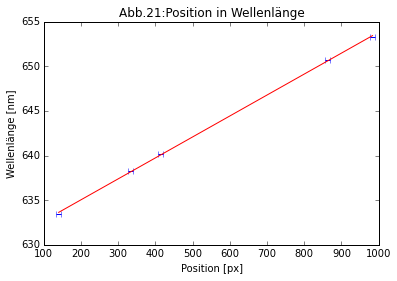

In [214]:
positions=np.array([140.0,334.2,413.2,862.9,983.6])
dpositions=np.array([6.3,6.6,6.6,7.4,7.2])
Wellenlänge=np.array([633.44276,638.29914,640.22480,650.65277,653.28824])
def Kalibrierung(x, M, N):
    return M*x+N
popt,pcov=curve_fit(Kalibrierung, positions, Wellenlänge, sigma=dpositions)
plt.errorbar(positions, Wellenlänge, xerr=dpositions, fmt="none")
plt.plot(positions, Kalibrierung(positions, *popt), "-r")
plt.title("Abb.21:Position in Wellenlänge")
plt.xlabel("Position [px]")
plt.ylabel("Wellenlänge [nm]")
plt.savefig("KalibrierungII.pdf")
print("M", popt[0], "+-", pcov[0,0]**0.5)
print("N", popt[1], "+-", pcov[1,1]**0.5)

In [215]:
print("Wellenlänge CD", Kalibrierung(394.1,popt[0], popt[1]))
print("Wellenlänge Unbekannt", Kalibrierung(555.5,popt[0],popt[1]))

Wellenlänge CD 639.597235819
Wellenlänge Unbekannt 643.384771486


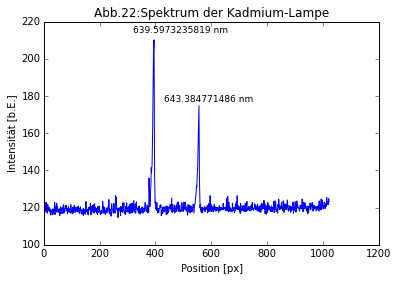

In [216]:
x, y = np.loadtxt("TobiThimo/KadmiumShift.xls", unpack=True, skiprows=1)
plt.plot(x,y)
plt.title("Abb.22:Spektrum der Kadmium-Lampe")
plt.xlabel("Position [px]")
plt.ylabel("Intensität [b.E.]")
plt.text(320, 214, "639.5973235819 nm", fontsize=9)
plt.text(430, 177, "643.384771486 nm", fontsize=9)


plt.savefig("Kadmiumpektrum.pdf")